In [1]:
from luna.dataset import LUNADataset
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from luna.utils import extract_patch
from luna.constants import INPUT_SIZE, PATCH_SIZE, PATCH_VOXEL_SPACING


In [2]:
ds = LUNADataset(Path("dataset"))

Loading training files: 100%|██████████| 539/539 [00:17<00:00, 30.00it/s]


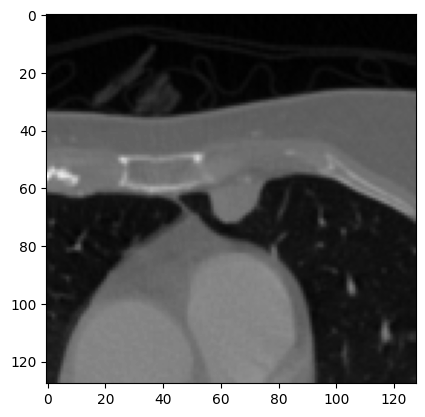

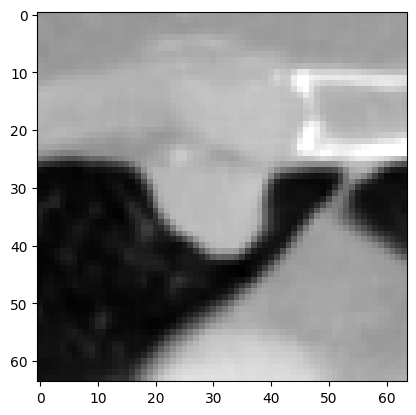

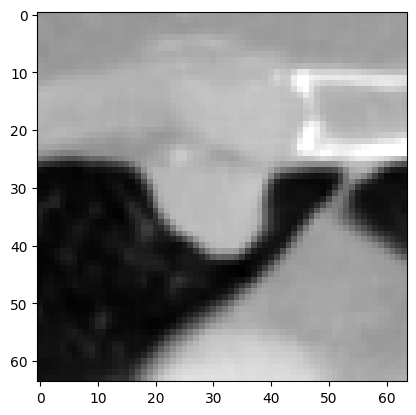

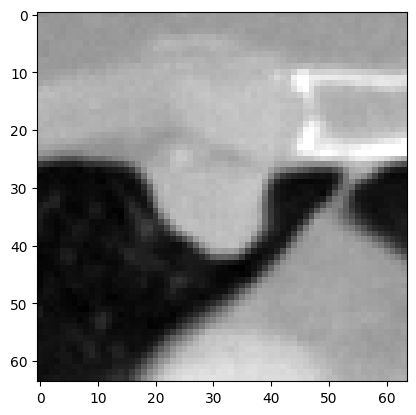

0.0


In [6]:
from dataloader import clip_and_scale


img = ds._raw_images[0]
plt.imshow(img[32], cmap="gray")
plt.show()
patch = extract_patch(
    raw_image=img,
    coord=tuple(np.array(INPUT_SIZE) // 2),
    srcVoxelOrigin=(0, 0, 0),
    srcWorldMatrix=ds._metadata[0]["transform"],
    srcVoxelSpacing=ds._metadata[0]["spacing"],
    output_shape=PATCH_SIZE,
    voxel_spacing=PATCH_VOXEL_SPACING,
    rotations=[(-20,20)] * 3,
    translations=5,
    mirrorings=(False, True, True),
    coord_space_world=False,
)

patch = patch.astype(np.float32)
clip = LUNADataset.scale_intensity(patch)
scale = clip_and_scale(patch)
noise = LUNADataset.scale_intensity(patch + np.random.normal(0, 10, patch.shape))
plt.imshow(scale[0][32], cmap="gray")
plt.show()
plt.imshow(clip[0][32], cmap="gray")
plt.show()
plt.imshow(noise[0][32], cmap="gray")
plt.show()

print(np.max(np.abs(clip - scale)))